In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model, Parameter, report_fit

df = pd.read_csv("Bst_CD.csv", comment='#')
df.columns = ['Lt','Y','SD']
df


,Lt,Y,SD
0,0.000000e+00,0.000000,0.000000
1,1.000000e-07,0.005371,0.007596
2,5.000000e-07,0.096432,0.007596
3,1.000000e-06,0.157368,0.007596
4,2.000000e-06,0.236535,0.007596
5,4.000000e-06,0.495864,0.007596
6,5.000000e-06,0.475712,0.007596
7,1.000000e-05,0.823073,0.007596
8,2.000000e-05,0.854562,0.007596
9,3.000000e-05,0.863608,0.007596


(0, 0.0002)

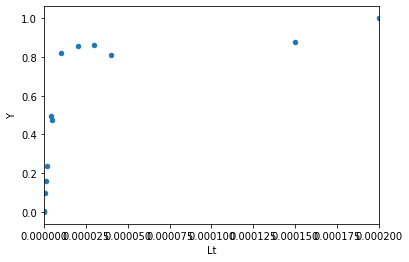

In [2]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

df.plot(x = 'Lt', y = 'Y', yerr = 'SD', kind ='scatter')
plt.xlim([0, 0.000200])

In [4]:
def quadra(kd, x,a):  
  return a*((kd+2e-6+x)-((kd+2e-6+x)**2-4*2e-6*x)**0.5)/(2*2e-6)
model = Model(quadra, independent_vars=['x'])
kd=1e-6;a=1
result = model.fit(df.Y, x=df.Lt, kd=kd,a=a)  

# fitted with both Kd and h against ANSHill model. The valid result of h can be only accepted when fitted Kd is reasonable.

result.params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a     0.9559     -inf      inf  0.03329     True     None     None
kd  3.02e-06     -inf      inf 5.631e-07     True     None     None


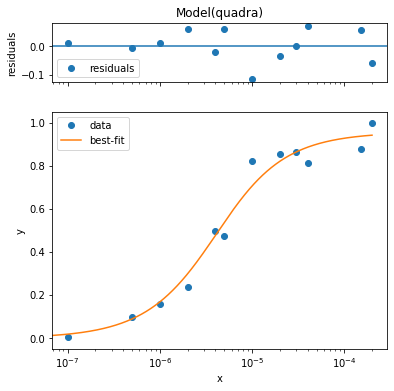

In [5]:
result.plot(numpoints=100000)
plt.xscale('log') 
plt.savefig('figure_massbalance.pdf', dpi=300)